In [1]:
import io
from datetime import timedelta
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from qiskit import QuantumCircuit
from qiskit.circuit.library import (
    EfficientSU2,
    PauliFeatureMap,
    RealAmplitudes,
    ZFeatureMap,
    ZZFeatureMap,
    n_local,
    z_feature_map,
    zz_feature_map,
)
from qiskit_aer import AerSimulator
from qiskit_algorithms.optimizers import Optimizer
from qiskit_ibm_runtime import Sampler
from qiskit_machine_learning.algorithms import QSVC, VQC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.optimizers import COBYLA, CRS, SPSA
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.utils import algorithm_globals
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from ucimlrepo import fetch_ucirepo
from utils import (
    RANDOM_SEED,
    display_confussion_matrix,
    evaluate_classifier,
    get_dataset,
    show_metrics,
)

# Desarrolla una QNN

En este notebook probamos diferentes configuraciones de QNNs para poder elegir la más óptima.

Al igual que siempre, fijamos la semilla de los números aleatorios para que los resultados sean reproducibles entre ejecuciones.

In [2]:
algorithm_globals.random_seed = RANDOM_SEED

## Preprocesado del dataset

Utilizamos una función `get_dataset` del módulo `utilis.py` que hemos definido. El funcionamiento de esta función es exactamente el mismo que el de la sección de preprocesado del notebook [practica final](practica_final.ipynb).

In [3]:
X_train, y_train, X_test, y_test, X_val, y_val = get_dataset()

## Probar distintas QNN

A continuación probamos diferentes clasificadores. Estos se diferencian en `ansatz`, `feature_map` y `optimizer`.

Para ello, primero definimos una función para realizar el entrenamiento y otra para realizar la validación del clasificador.

In [4]:
def train_VQC(
    feature_map: QuantumCircuit, ansatz: QuantumCircuit, optimizer: Optimizer
) -> VQC:
    global X_train, y_train

    vqc = VQC(
        feature_map=feature_map,
        ansatz=ansatz,
        optimizer=optimizer,
        callback=LossLogger().log_loss,
        sampler=Sampler(AerSimulator()),
    )

    start = time()
    vqc.fit(X_train, y_train.values)
    total_time = time() - start
    print(f"Tiempo total de entrenamiento: {timedelta(seconds=total_time)}")

    return vqc


class LossLogger:
    def __init__(self):
        self._iteration = 0

    def log_loss(self, weights, obj_func_eval):
        self._iteration += 1
        print(f"Iteración {self._iteration} - Loss: {obj_func_eval:.4f}")

In [5]:
number_of_features = X_train.shape[1]

Con esto ya podemos probar diferentes configuraciones:

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 1.0742
Iteración 2 - Loss: 1.6091
Iteración 3 - Loss: 1.0013
Iteración 4 - Loss: 1.0268
Iteración 5 - Loss: 1.0336
Iteración 6 - Loss: 1.0004
Iteración 7 - Loss: 0.9995
Iteración 8 - Loss: 1.0014
Iteración 9 - Loss: 0.9966
Iteración 10 - Loss: 1.4506
Iteración 11 - Loss: 0.9924
Iteración 12 - Loss: 0.9797
Iteración 13 - Loss: 0.9791
Iteración 14 - Loss: 0.9782
Iteración 15 - Loss: 0.9738
Iteración 16 - Loss: 0.9784
Iteración 17 - Loss: 0.9776
Iteración 18 - Loss: 0.9964
Iteración 19 - Loss: 1.0196
Iteración 20 - Loss: 0.9758
Tiempo total de entrenamiento: 0:01:35.865609
--- Resultados para entrenamiento ---
Accuracy: 0.5931
Precision: 0.0000
--- Resultados para test ---
Accuracy: 0.5900
Precision: 0.0000


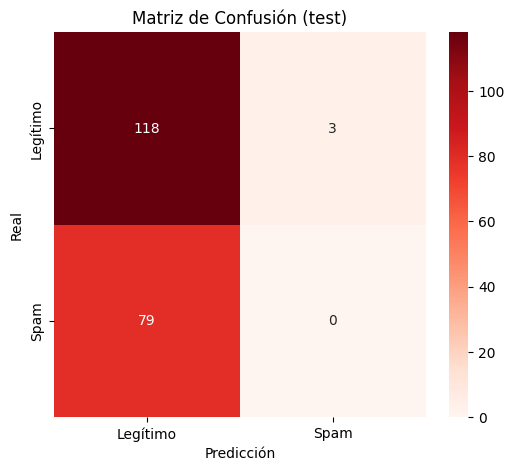

None

In [6]:
feature_map = z_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 0.9663
Iteración 2 - Loss: 0.9765
Iteración 3 - Loss: 0.9574
Iteración 4 - Loss: 0.9567
Iteración 5 - Loss: 0.9552
Iteración 6 - Loss: 0.9601
Iteración 7 - Loss: 0.9566
Iteración 8 - Loss: 0.9570
Iteración 9 - Loss: 0.9566
Iteración 10 - Loss: 0.9819
Iteración 11 - Loss: 0.9491
Iteración 12 - Loss: 0.9538
Iteración 13 - Loss: 0.9478
Iteración 14 - Loss: 0.9509
Iteración 15 - Loss: 0.9510
Iteración 16 - Loss: 0.9515
Iteración 17 - Loss: 0.9492
Iteración 18 - Loss: 0.9572
Iteración 19 - Loss: 0.9497
Iteración 20 - Loss: 0.9492
Tiempo total de entrenamiento: 0:03:02.457285
--- Resultados para entrenamiento ---
Accuracy: 0.6139
Precision: 0.5152
--- Resultados para test ---
Accuracy: 0.6550
Precision: 0.5926


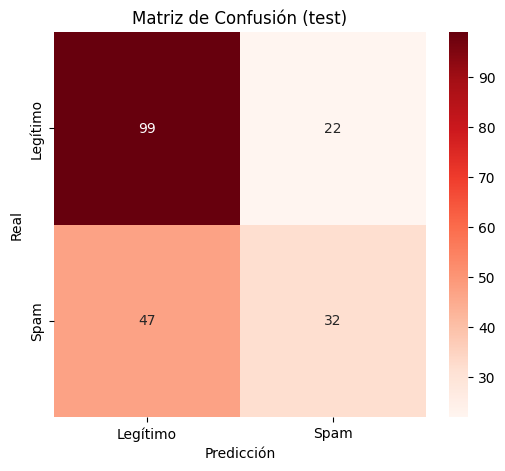

None

In [7]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 0.9578
Iteración 2 - Loss: 0.9988
Iteración 3 - Loss: 0.9571
Iteración 4 - Loss: 0.9589
Iteración 5 - Loss: 0.9623
Iteración 6 - Loss: 0.9575
Iteración 7 - Loss: 0.9610
Iteración 8 - Loss: 0.9568
Iteración 9 - Loss: 0.9576
Iteración 10 - Loss: 1.0126
Iteración 11 - Loss: 0.9600
Iteración 12 - Loss: 0.9611
Iteración 13 - Loss: 0.9618
Iteración 14 - Loss: 0.9572
Iteración 15 - Loss: 0.9593
Iteración 16 - Loss: 0.9586
Iteración 17 - Loss: 0.9561
Iteración 18 - Loss: 0.9732
Iteración 19 - Loss: 0.9593
Iteración 20 - Loss: 0.9566
Tiempo total de entrenamiento: 0:03:06.823433
--- Resultados para entrenamiento ---
Accuracy: 0.6208
Precision: 0.5165
--- Resultados para test ---
Accuracy: 0.6450
Precision: 0.5526


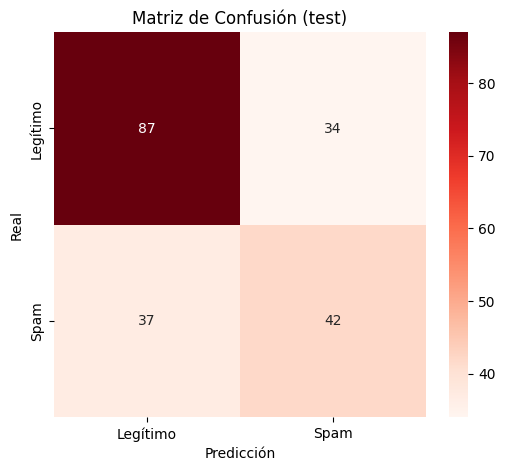

None

In [8]:
feature_map = zz_feature_map(number_of_features)
ansatz = RealAmplitudes(number_of_features).decompose()
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 1.0215
Iteración 2 - Loss: 1.0557
Iteración 3 - Loss: 1.0168
Iteración 4 - Loss: 1.0230
Iteración 5 - Loss: 1.0184
Iteración 6 - Loss: 1.0189
Iteración 7 - Loss: 1.0155
Iteración 8 - Loss: 1.0151
Iteración 9 - Loss: 1.0153
Iteración 10 - Loss: 1.0816
Iteración 11 - Loss: 1.0132
Iteración 12 - Loss: 1.0168
Iteración 13 - Loss: 1.0141
Iteración 14 - Loss: 1.0213
Iteración 15 - Loss: 1.0154
Iteración 16 - Loss: 1.0145
Iteración 17 - Loss: 1.0131
Iteración 18 - Loss: 1.0011
Iteración 19 - Loss: 1.0031
Iteración 20 - Loss: 1.0047
Tiempo total de entrenamiento: 0:03:05.640529
--- Resultados para entrenamiento ---
Accuracy: 0.5264
Precision: 0.3755
--- Resultados para test ---
Accuracy: 0.5350
Precision: 0.4028


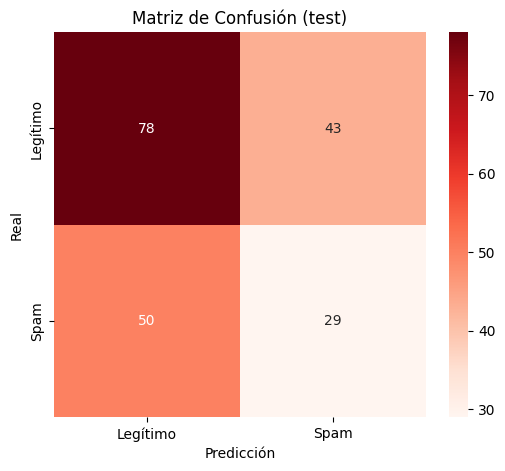

None

In [9]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=3)
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Iteración 1 - Loss: 1.0915
Iteración 2 - Loss: 1.7699
Iteración 3 - Loss: 1.0686
Iteración 4 - Loss: 1.0860
Iteración 5 - Loss: 1.1504
Iteración 6 - Loss: 1.0703
Iteración 7 - Loss: 1.0703
Iteración 8 - Loss: 1.0713
Iteración 9 - Loss: 1.0739
Iteración 10 - Loss: 1.7997
Iteración 11 - Loss: 0.9750
Iteración 12 - Loss: 0.9733
Iteración 13 - Loss: 0.9732
Iteración 14 - Loss: 0.9749
Iteración 15 - Loss: 0.9737
Iteración 16 - Loss: 0.9732
Iteración 17 - Loss: 0.9753
Iteración 18 - Loss: 1.1231
Iteración 19 - Loss: 0.9839
Iteración 20 - Loss: 0.9753
Tiempo total de entrenamiento: 0:01:36.967028
--- Resultados para entrenamiento ---
Accuracy: 0.5750
Precision: 0.0000
--- Resultados para test ---
Accuracy: 0.5650
Precision: 0.0000


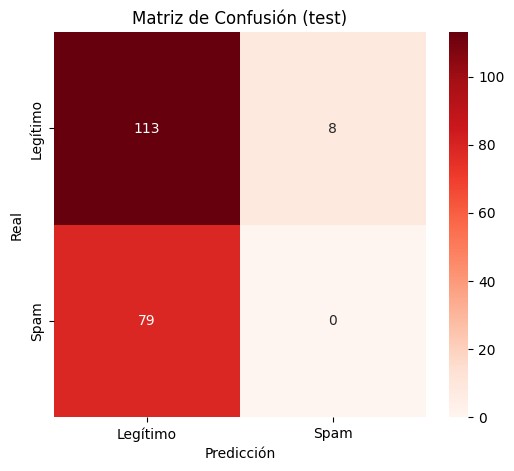

None

In [10]:
feature_map = z_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=3)
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:14:17.458764
--- Resultados para entrenamiento ---
Accuracy: 0.6694
Precision: 0.6533
--- Resultados para test ---
Accuracy: 0.6800
Precision: 0.6744


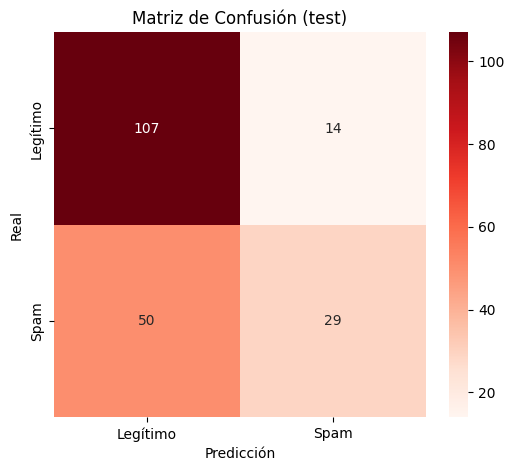

None

In [11]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:07:24.352221
--- Resultados para entrenamiento ---
Accuracy: 0.5889
Precision: 0.1250
--- Resultados para test ---
Accuracy: 0.6000
Precision: 0.0000


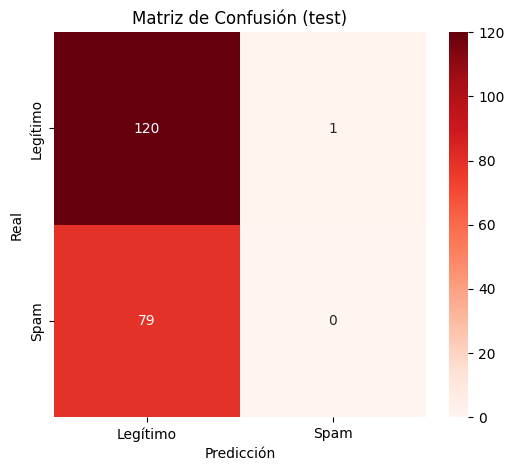

None

In [12]:
feature_map = z_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

## Análisis de los resultados

En la siguiente tabla mostramos los resultados obtenidos con las diferentes configuraciones:

| *Feature Map*    | ***Ansatz***      | ***Optimizer*** | ***Accuracy (train)*** | ***Precision (train)*** | ***Accuracy (test)*** | ***Precision (test)*** |
| ---------------- | ----------------- | --------------- | ---------------------- | ----------------------- | --------------------- | ---------------------- |
| `z_feature_map`  | `n_local`         | `COBYLA`        | 0.5931                 | 0.0000                  | 0.5900                | 0.0000                 |
| `zz_feature_map` | `n_local`         | `COBYLA`        | 0.6139                 | 0.5152                  | 0.6550                | 0.5926                 |
| `zz_feature_map` | `RealAmplitudes`  | `COBYLA`        | 0.6208                 | 0.5165                  | 0.6450                | 0.5526                 |
| `zz_feature_map` | `n_local(reps=3)` | `COBYLA`        | 0.5264                 | 0.3755                  | 0.5350                | 0.4028                 |
| `z_feature_map`  | `n_local(reps=3)` | `COBYLA`        | 0.5750                 | 0.0000                  | 0.5650                | 0.0000                 |
| `zz_feature_map` | `n_local`         | `SPSA`          | 0.6694                 | 0.6533                  | 0.6800                | 0.6744                 |
| `z_feature_map`  | `n_local`         | `SPSA`          | 0.5889                 | 0.1250                  | 0.6000                | 0.0000                 |

Vemos que `z_feature_map` produce muy malos resultados, pues tiende a clasificar todo como negativo (como correo legítimo), mientras que con `zz_feature_map` ya obtenemos resultados más correctos, aunque siguen siendo muy malos, siendo el mejor modelo aquel que utiliza el optimizador `SPSA`, con un 68% de accuracy y un 67.44% de precision en test.

## Segunda iteración

### Probar diferentes reps con SPSA

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:13:24.615144
--- Resultados para entrenamiento ---
Accuracy: 0.6681
Precision: 0.5801
--- Resultados para test ---
Accuracy: 0.6750
Precision: 0.5921


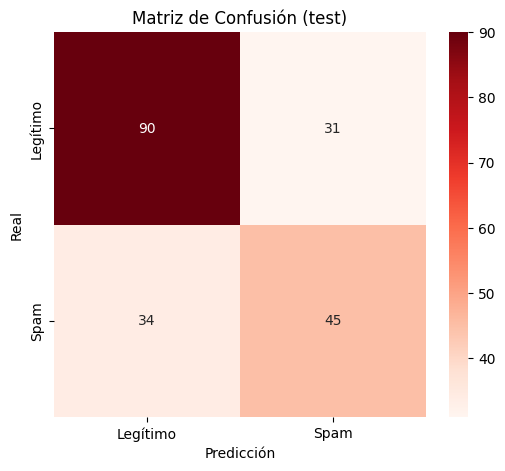

None

In [6]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=2)
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:14:00.092065
--- Resultados para entrenamiento ---
Accuracy: 0.6750
Precision: 0.6923
--- Resultados para test ---
Accuracy: 0.6950
Precision: 0.7500


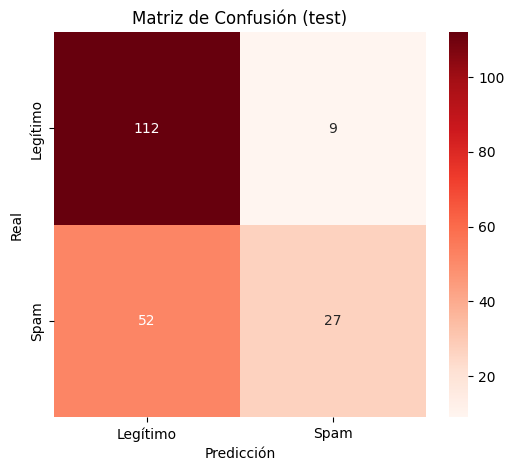

None

In [7]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=3)
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

In [ ]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=4)
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


In [ ]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=5)
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

### Probar SPSA con diferentes `maxiter`

En `COBYLA` no tiene mucho sentido probarlo ya que el callback no muestra que mejoren los resultados a lo largo de las iteraciones. Sin embargo, con `SPSA` el callback no funciona, por lo que tiene sentido probar explícitamente a modificar `maxiter`.

In [ ]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = SPSA(maxiter=10)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

In [ ]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = SPSA(maxiter=30)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

### Probar distintas opciones de entrelazamiento con SPSA

In [ ]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "reverse_linear")
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

In [ ]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "pairwise")
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

In [ ]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "sca")
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

In [ ]:
feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "full")
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

### Probar distintas opciones de entrelazamiento con COBYLA

In [ ]:
feature_map = z_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

In [ ]:
feature_map = z_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "reverse_linear")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

In [ ]:
feature_map = z_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "pairwise")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

In [ ]:
feature_map = z_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "sca")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

In [ ]:
feature_map = z_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "full")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

## Probar diferentes `ansatz`

### RealAmplitudes

In [ ]:
feature_map = z_feature_map(number_of_features)
ansatz = RealAmplitudes(num_qubits=number_of_features, entanglement="linear")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

In [ ]:
feature_map = z_feature_map(number_of_features)
ansatz = RealAmplitudes(num_qubits=number_of_features, reps=2, entanglement="linear")
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

### EfficientSU2

In [ ]:
feature_map = z_feature_map(number_of_features)
ansatz = EfficientSU2(
    num_qubits=number_of_features, entanglement="linear", su2_gates=["ry", "rz"]
)
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)

In [ ]:
feature_map = z_feature_map(number_of_features)
ansatz = EfficientSU2(
    num_qubits=number_of_features, reps=2, entanglement="linear", su2_gates=["ry", "rz"]
)
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
evaluate_classifier(vqc, X_train, y_train, X_test, y_test)